In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Part 1: Data Understanding – Output of this part will be various visualization of the
variable analysis and finally the Data Quality Report that will identify the data problems
that exist in this dataset

In [ ]:
print(df.shape)

(1460, 81)


In [ ]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Dealing with Categorical


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

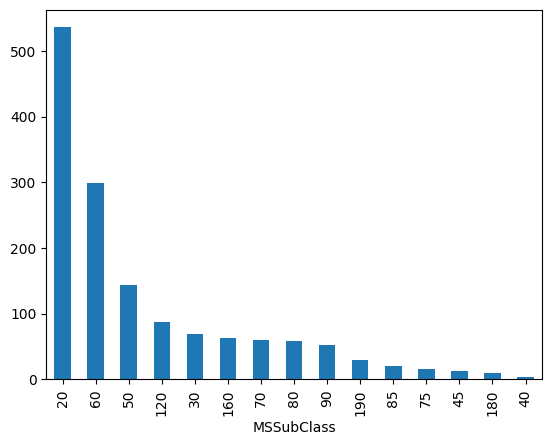

In [ ]:
df['MSSubClass'].value_counts().plot(kind='bar')
plt.show()

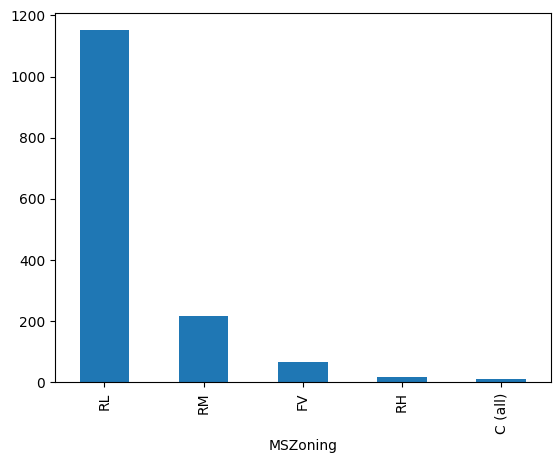

In [ ]:
df['MSZoning'].value_counts().plot(kind='bar')
plt.show()

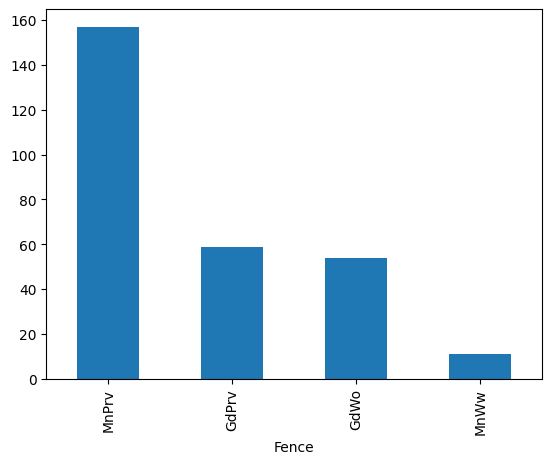

In [ ]:
df['Fence'].value_counts().plot(kind='bar')
plt.show()

Categorical Features
1. ID
2. MSSubClass
3. MS Zoning
4. Street
5. Alley
6. Lot Shape
7. LandContour
8. Utilities
9. LotConfig
10. LandSlope
11. Neighborhood
12. Condition1
13. Condition2
14. BldgType
15. HouseStyle
16. RoofStyle
17. RoofMatl
18. Exteriror1st
19. Exterior 2nd
20. MasVnrType
21. ExterQual
22. ExterCond
23. Foundation
24. BsmtQual
25. BsmtCond
26. BsmtExposure
27. BsmtFinType1
28. BsmtFinType2
29. Heating
30. HeatingQC
31. Central Air
32. Electrical
33. KitchenQual
34. Functional
35. FireplaceQu       
36. GarageType        
37. GarageFinish     
38. GarageQual        
39. GarageCond    
40. PavedDrive     
41. PoolQC          
42. Fence          
43. MiscFeature       
44. SaleType          
45. SaleCondition    




Dealing with Numerical

In [ ]:
categorical_columns = df.select_dtypes(include=['float']).columns
categorical_columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [ ]:
categorical_columns = df.select_dtypes(include=['int64']).columns
categorical_columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
print(df['YearBuilt'].describe())

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


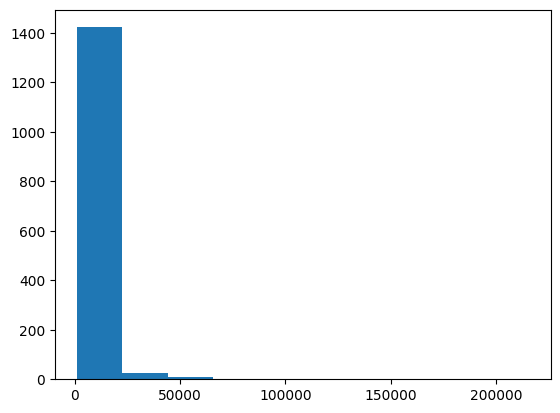

In [ ]:
plt.hist(df['LotArea'])
plt.show()

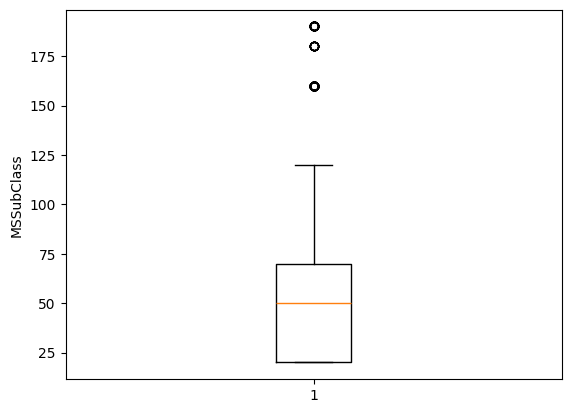

In [ ]:
plt.boxplot(df['MSSubClass'])
plt.ylabel('MSSubClass')
plt.show()

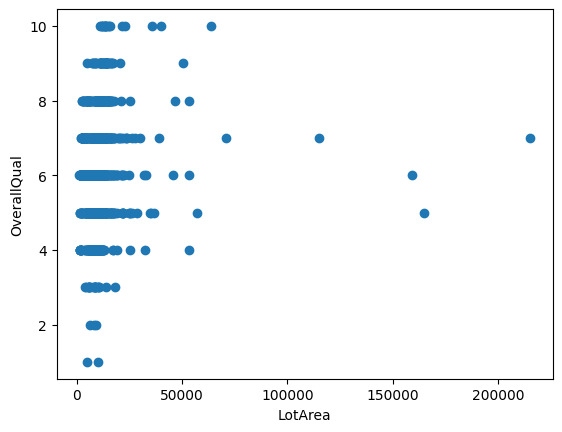

In [ ]:
plt.scatter(df['LotArea'], df['OverallQual'])
plt.xlabel('LotArea')
plt.ylabel('OverallQual')
plt.show()

In [ ]:
print(df['YearBuilt'].corr(df['SalePrice']))

0.5228973328794969


Data Quality Report


DQR Continuous Features


In [ ]:
def categorical_dqr(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    report = []
    for col in categorical_cols:
        mode = df[col].mode()
        mode_value = mode[0] if not mode.empty else None
        second_mode_value = df[col].value_counts().index[1] if len(df[col].value_counts()) > 1 else None

        report.append({
            "Column Name": col,
            "Count": df[col].notnull().sum(),
            "Missing %": round(df[col].isnull().mean() * 100, 2),
            "Cardinality": df[col].nunique(),
            "Mode": mode_value,
            "Mode Frequency": df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0,
            "Mode %": round(df[col].value_counts(normalize=True).iloc[0] * 100, 2) if not df[col].value_counts().empty else 0,
            "2nd Mode": second_mode_value,
            "2nd Mode Frequency": df[col].value_counts().iloc[1] if len(df[col].value_counts()) > 1 else 0,
            "2nd Mode %": round(df[col].value_counts(normalize=True).iloc[1] * 100, 2) if len(df[col].value_counts()) > 1 else 0
        })

    return pd.DataFrame(report)

categorical_report = categorical_dqr(df)
print(categorical_report)

      Column Name  Count  Missing %  Cardinality     Mode  Mode Frequency  \
0        MSZoning   1460       0.00            5       RL            1151   
1          Street   1460       0.00            2     Pave            1454   
2           Alley     91      93.77            2     Grvl              50   
3        LotShape   1460       0.00            4      Reg             925   
4     LandContour   1460       0.00            4      Lvl            1311   
5       Utilities   1460       0.00            2   AllPub            1459   
6       LotConfig   1460       0.00            5   Inside            1052   
7       LandSlope   1460       0.00            3      Gtl            1382   
8    Neighborhood   1460       0.00           25    NAmes             225   
9      Condition1   1460       0.00            9     Norm            1260   
10     Condition2   1460       0.00            8     Norm            1445   
11       BldgType   1460       0.00            5     1Fam            1220   

In [ ]:
def numerical_dqr(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    report = []

    for col in numerical_cols:
        report.append({
            "Column Name": col,
            "Count": df[col].notnull().sum(),
            "Missing %": round(df[col].isnull().mean() * 100, 2),
            "Cardinality": df[col].nunique(),
            "Mean": round(df[col].mean(), 2),
            "Std Dev": round(df[col].std(), 2),
            "Min": df[col].min(),
            "25th Percentile": df[col].quantile(0.25),
            "Median (50th)": df[col].median(),
            "75th Percentile": df[col].quantile(0.75),
            "Max": df[col].max()
        })

    return pd.DataFrame(report)
numerical_report = numerical_dqr(df)
print(numerical_report)

      Column Name  Count  Missing %  Cardinality       Mean   Std Dev  \
0              Id   1460       0.00         1460     730.50    421.61   
1      MSSubClass   1460       0.00           15      56.90     42.30   
2     LotFrontage   1201      17.74          110      70.05     24.28   
3         LotArea   1460       0.00         1073   10516.83   9981.26   
4     OverallQual   1460       0.00           10       6.10      1.38   
5     OverallCond   1460       0.00            9       5.58      1.11   
6       YearBuilt   1460       0.00          112    1971.27     30.20   
7    YearRemodAdd   1460       0.00           61    1984.87     20.65   
8      MasVnrArea   1452       0.55          327     103.69    181.07   
9      BsmtFinSF1   1460       0.00          637     443.64    456.10   
10     BsmtFinSF2   1460       0.00          144      46.55    161.32   
11      BsmtUnfSF   1460       0.00          780     567.24    441.87   
12    TotalBsmtSF   1460       0.00          721   

Part 2:
In this part you will fix the data problems identified in the Data Quality Report learning from python techniques and code samples shared with you

In [ ]:
df_preprocessed = df.copy()

In [ ]:
print(df_preprocessed.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#Drop Categorical Features over 60% missing values
1. Alley
2. PoolQC
3. Fence
4. MiscFeature

In [ ]:
#print(df_preprocessed['MiscFeature'])
#df_preprocessed = df_preprocessed.drop(columns=['MiscFeature'])
df_preprocessed.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [ ]:
print(df_preprocessed.shape)

(1460, 77)


# Handling features over 30% missing values
1. MasVnrType
2. Fireplacequ

In [ ]:
#MasVnrType
#drop MasVnrType b/c it does not add much value to predicting price
df_preprocessed['MasVnrType'].value_counts()
df_preprocessed['MasVnrType'].isnull().sum()
df_preprocessed = df_preprocessed.drop(columns=['MasVnrType'])

In [ ]:
#Fireplacequ, replaced all null values with NA
df_preprocessed[df_preprocessed['FireplaceQu'].isnull()]
#print(df_preprocessed[df_preprocessed['FireplaceQu'].isnull()][['FireplaceQu', 'Fireplaces']])
df_preprocessed.loc[df_preprocessed['Fireplaces'] == 0, 'FireplaceQu'] = 'NA'
df_preprocessed['FireplaceQu'].value_counts()
df_preprocessed[df_preprocessed['FireplaceQu'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#Handling Features with less than 10% missing values

In [ ]:
#GarageType, GarageFinish, GarageQual, GarageCond- replaced null values with NA and GarageYrBuilt with 0
df_preprocessed['GarageType'].value_counts()
df_preprocessed[df_preprocessed['GarageType'].isnull()][['GarageType', 'GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]
df_preprocessed[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df_preprocessed[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NA')
df_preprocessed.loc[df_preprocessed['GarageType'] == 'NA', 'GarageYrBlt'] = 0

In [ ]:
df_preprocessed['GarageType'].value_counts()

,count
GarageType,
Attchd,870
Detchd,387
BuiltIn,88
NA,81
Basment,19
CarPort,9
2Types,6


In [ ]:
df_preprocessed['BsmtFinType2'].value_counts()
df_preprocessed['BsmtFinType2'].isnull().sum()

0

In [ ]:
df_preprocessed[df_preprocessed['BsmtFinType2'].isnull()][['BsmtQual', 'BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]
df_preprocessed['BsmtQual'].fillna('NA', inplace=True)
df_preprocessed['BsmtCond'].fillna('NA', inplace=True)
df_preprocessed['BsmtExposure'].fillna('NA', inplace=True)
df_preprocessed['BsmtFinType1'].fillna('NA', inplace=True)
df_preprocessed['BsmtFinType1'].fillna('NA', inplace=True)
df_preprocessed.loc[df_preprocessed['BsmtQual'] == 'NA', 'BsmtFinType2'] = 'NA'
#used mode to fill in the one missing value
df_preprocessed['BsmtFinType2'].fillna('Unf', inplace=True)

<ipython-input-107-b8ce78b7631d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_preprocessed['BsmtQual'].fillna('NA', inplace=True)
<ipython-input-107-b8ce78b7631d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
#Electrical- 1 missing value, replaced with mode
df_preprocessed['Electrical'].value_counts()
df_preprocessed['Electrical'].isnull().sum()
df_preprocessed[df_preprocessed['Electrical'].isnull()]
df_preprocessed['Electrical'].fillna('SBrkr', inplace=True)

<ipython-input-115-c673c5d85a12>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_preprocessed['Electrical'].fillna('SBrkr', inplace=True)


#Handling Missing Continuous Features

In [ ]:
#Lot Frontage
df_preprocessed['LotFrontage'].mean()
df_preprocessed['LotFrontage'] = df_preprocessed['LotFrontage'].fillna(df_preprocessed['LotFrontage'].mean())

In [ ]:
#MasVnrArea
df_preprocessed['MasVnrArea'].describe()
df_preprocessed['MasVnrArea'].isnull().sum()
df_preprocessed['MasVnrArea'] = df_preprocessed['MasVnrArea'].fillna(df_preprocessed['MasVnrArea'].mean())

In [ ]:
#GarageYrBlt was dealt in the Handling Missing Categorical Features

In [ ]:
print(df_preprocessed.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [ ]:
df_no_missing_value = df_preprocessed

#Dropping Columns that provide no predictive value

In [ ]:
df_no_missing_value.drop(columns=['Id'], inplace=True)
df_no_missing_value.drop(columns=['Street'], inplace=True) #low cardinality

#Handling Skewed Values

In [ ]:
df_no_missing_value.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<ipython-input-155-239ec4feefe2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_missing_value['PoolArea'])


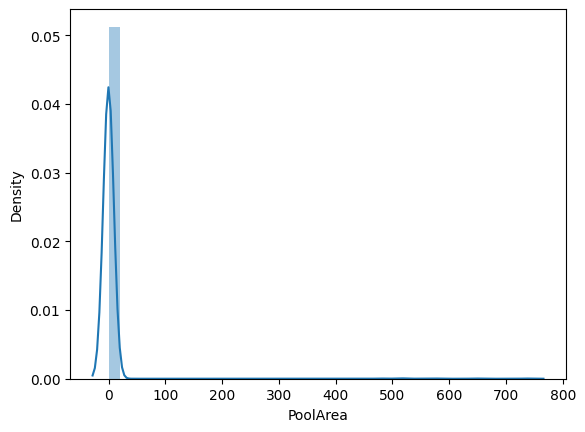

In [ ]:
sns.distplot(df_no_missing_value['PoolArea'])
plt.show()

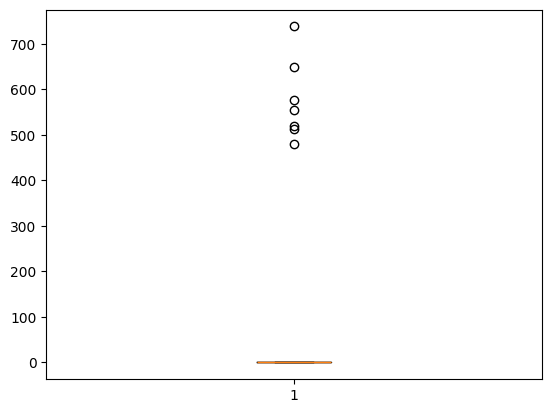

In [ ]:
df_no_missing_value['PoolArea'].describe()
plt.boxplot(df_no_missing_value['PoolArea'])
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_no_missing_value['PoolArea'].describe()

,PoolArea
count,1460.000000
mean,2.758904
std,40.177307
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,738.000000


In [ ]:
#capping outliers for pool area
Q1 = df_no_missing_value['PoolArea'].quantile(0.25)
Q3 = df_no_missing_value['PoolArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_missing_value['PoolArea'] = np.clip(df_no_missing_value['PoolArea'], lower_bound, upper_bound)


In [ ]:
#capping outliers for LowQualFinSF
Q1 = df_no_missing_value['LowQualFinSF'].quantile(0.25)
Q3 = df_no_missing_value['LowQualFinSF'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_missing_value['LowQualFinSF'] = np.clip(df_no_missing_value['LowQualFinSF'], lower_bound, upper_bound)


In [ ]:
#capping outliers for 3SSnPorch
Q1 = df_no_missing_value['3SsnPorch'].quantile(0.25)
Q3 = df_no_missing_value['3SsnPorch'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_missing_value['3SsnPorch'] = np.clip(df_no_missing_value['3SsnPorch'], lower_bound, upper_bound)

In [ ]:
#capping outliers for ScreenPorch
Q1 = df_no_missing_value['ScreenPorch'].quantile(0.25)
Q3 = df_no_missing_value['ScreenPorch'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_missing_value['ScreenPorch'] = np.clip(df_no_missing_value['ScreenPorch'], lower_bound, upper_bound)

In [ ]:
#capping outliers for MiscVal
Q1 = df_no_missing_value['MiscVal'].quantile(0.25)
Q3 = df_no_missing_value['MiscVal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_missing_value['MiscVal'] = np.clip(df_no_missing_value['MiscVal'], lower_bound, upper_bound)

#Scaling Continuous Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF'
]

for column in columns_to_scale:
    df_no_missing_value[column] = scaler.fit_transform(df_no_missing_value[[column]])
    print(df_no_missing_value[[column]])

Streaming output truncated to the last 5000 lines.
843    -0.288653
844    -0.288653
845    -0.288653
846    -0.288653
847    -0.288653
848    -0.288653
849    -0.288653
850    -0.288653
851    -0.288653
852    -0.288653
853    -0.288653
854     6.439444
855    -0.288653
856     2.408787
857    -0.288653
858    -0.288653
859    -0.288653
860    -0.288653
861    -0.288653
862    -0.288653
863    -0.288653
864    -0.288653
865    -0.288653
866    -0.288653
867    -0.288653
868    -0.288653
869    -0.288653
870    -0.288653
871    -0.288653
872    -0.288653
873    -0.288653
874    -0.288653
875    -0.288653
876    -0.288653
877    -0.288653
878    -0.288653
879    -0.288653
880    -0.288653
881    -0.288653
882    -0.288653
883    -0.288653
884    -0.288653
885    -0.288653
886    -0.288653
887    -0.288653
888     4.814780
889    -0.288653
890    -0.288653
891     2.811853
892    -0.288653
893    -0.288653
894    -0.288653
895    -0.288653
896    -0.288653
897    -0.288653
898    -0.2886

#Binning Numerical Features

In [ ]:
df_no_missing_value.select_dtypes(include=['object', 'category']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode MSZoning as integers
label_encoder = LabelEncoder()
df_no_missing_value['MSZoning_encoded'] = label_encoder.fit_transform(df_no_missing_value['MSZoning'])

print(df_no_missing_value[['MSZoning', 'MSZoning_encoded']])

     MSZoning  MSZoning_encoded
0          RL                 3
1          RL                 3
2          RL                 3
3          RL                 3
4          RL                 3
5          RL                 3
6          RL                 3
7          RL                 3
8          RM                 4
9          RL                 3
10         RL                 3
11         RL                 3
12         RL                 3
13         RL                 3
14         RL                 3
15         RM                 4
16         RL                 3
17         RL                 3
18         RL                 3
19         RL                 3
20         RL                 3
21         RM                 4
22         RL                 3
23         RM                 4
24         RL                 3
25         RL                 3
26         RL                 3
27         RL                 3
28         RL                 3
29         RM                 4
30    C 

In [ ]:
# Encode LandContour as integers
label_encoder = LabelEncoder()
df_no_missing_value['LandContour_encoded'] = label_encoder.fit_transform(df_no_missing_value['LandContour'])

print(df_no_missing_value[['LandContour', 'LandContour_encoded']])

     LandContour  LandContour_encoded
0            Lvl                    3
1            Lvl                    3
2            Lvl                    3
3            Lvl                    3
4            Lvl                    3
5            Lvl                    3
6            Lvl                    3
7            Lvl                    3
8            Lvl                    3
9            Lvl                    3
10           Lvl                    3
11           Lvl                    3
12           Lvl                    3
13           Lvl                    3
14           Lvl                    3
15           Lvl                    3
16           Lvl                    3
17           Lvl                    3
18           Lvl                    3
19           Lvl                    3
20           Lvl                    3
21           Bnk                    0
22           Lvl                    3
23           Lvl                    3
24           Lvl                    3
25          

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'
]
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df_no_missing_value[f'{column}_encoded'] = label_encoder.fit_transform(df_no_missing_value[column])
    print(df_no_missing_value[[column, f'{column}_encoded']])


Streaming output truncated to the last 5000 lines.
843          NA                   3
844          TA                   5
845          TA                   5
846          TA                   5
847          TA                   5
848          TA                   5
849          TA                   5
850          TA                   5
851          TA                   5
852          TA                   5
853          TA                   5
854          TA                   5
855          TA                   5
856          Fa                   1
857          TA                   5
858          TA                   5
859          TA                   5
860          TA                   5
861          TA                   5
862          TA                   5
863          TA                   5
864          TA                   5
865          TA                   5
866          TA                   5
867          TA                   5
868          TA                   5
869          

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
df_no_missing_value.dtypes

,0
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,float64
LotShape,int64
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object
Neighborhood,object


In [ ]:
#dropping categorical columns
df_no_missing_value = df_no_missing_value.drop(columns=[
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'
])



In [ ]:
df_no_missing_value.drop(columns=['MSZoning'], inplace=True)

In [ ]:
df_no_missing_value.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_encoded',
       'LotShape_encoded', 'LandContour_encoded', 'Utilities_encoded',
       'LotConfig_encoded', 'LandSlope_encoded', 'Neighborhood_encoded',
       'Condition1_encoded', 'Condition2_encoded', 'BldgType_encoded',
       'HouseStyle_encoded', 'RoofStyle_encoded', 'RoofMatl_encoded',
       'Exterior1st_encoded', 'Exterior2nd_encoded', 'ExterQual_encoded',
       'ExterCond_encoded', 'Foundation_

In [ ]:
df_no_missing_value.dtypes


,0
MSSubClass,int64
LotFrontage,float64
LotArea,float64
LotShape,int64
OverallQual,int64
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
MasVnrArea,float64
BsmtFinSF1,float64


#Correlation

In [ ]:
correlation_matrix = df_no_missing_value.corr()
print(correlation_matrix)

                       MSSubClass   LotFrontage   LotArea  LotShape  \
MSSubClass               1.000000 -3.570559e-01 -0.139781  0.119289   
LotFrontage             -0.357056  1.000000e+00  0.306795 -0.144931   
LotArea                 -0.139781  3.067946e-01  1.000000 -0.165315   
LotShape                 0.119289 -1.449309e-01 -0.165315  1.000000   
OverallQual              0.032628  2.341962e-01  0.105806 -0.190497   
OverallCond             -0.059316 -5.282010e-02 -0.005636  0.013693   
YearBuilt                0.027850  1.175980e-01  0.014228 -0.226062   
YearRemodAdd             0.040581  8.274589e-02  0.013788 -0.153825   
MasVnrArea               0.022895  1.792835e-01  0.103960 -0.105586   
BsmtFinSF1              -0.069836  2.158284e-01  0.214103 -0.134033   
BsmtFinSF2              -0.065649  4.333957e-02  0.111170 -0.039738   
BsmtUnfSF               -0.140759  1.221556e-01 -0.002618 -0.021666   
TotalBsmtSF             -0.238518  3.633577e-01  0.260833 -0.175782   
1stFlr

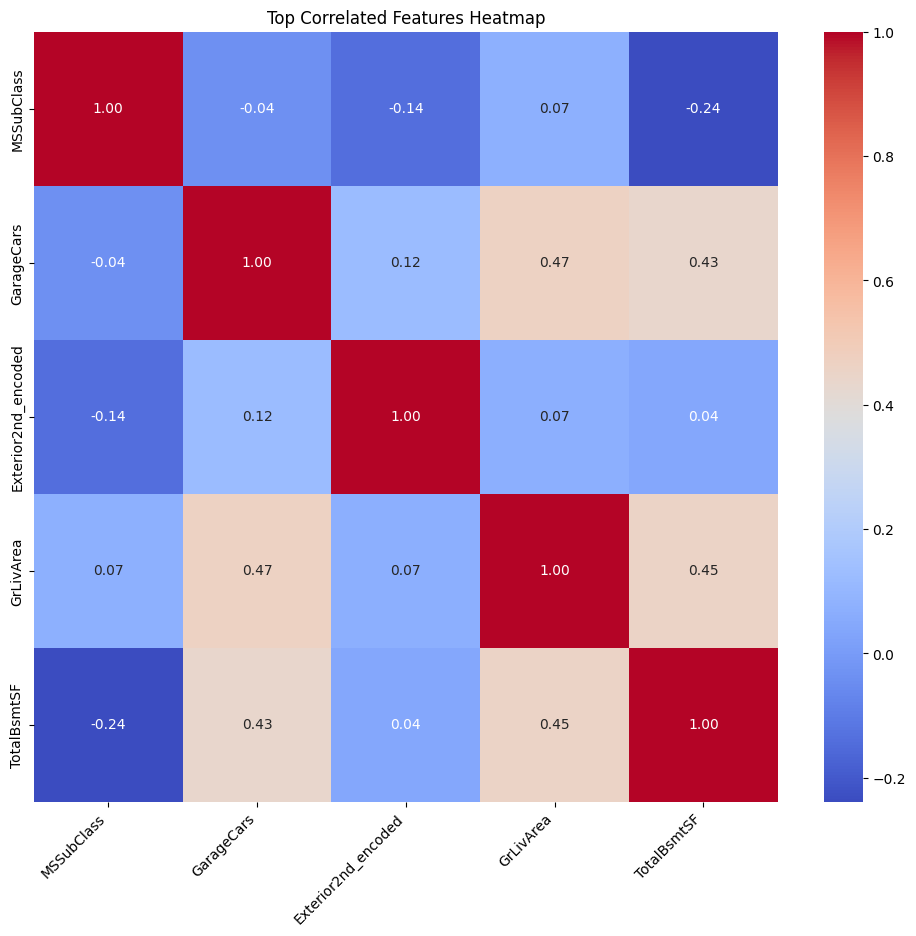

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlated_features = strong_corr.unstack().sort_values(ascending=False).drop_duplicates()
top_features = correlated_features[correlated_features.abs() > 0.8].index.get_level_values(0).unique()
subset_corr = correlation_matrix.loc[top_features, top_features]
plt.figure(figsize=(12, 10))
sns.heatmap(subset_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=45, ha='right')
plt.title("Top Correlated Features Heatmap")
plt.show()

In [ ]:
#dropping corralted features GarageCars, TotalBsmtSF
df_no_missing_value.drop(columns=['GarageCars','TotalBsmtSF'], inplace=True)